In [148]:
### Customer Churn Prediction Using ANN

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df = pd.read_csv('sample_data/Churn_Modelling.csv')

In [151]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [152]:
df.shape


(10000, 14)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [154]:
df.duplicated().sum()

0

In [155]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [156]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [157]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [158]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [159]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [160]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [161]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Exited']),df['Exited'],test_size=0.2,random_state=1)

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [165]:
model = Sequential()

In [166]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [167]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 672 (2.62 KB)

 Trainable params: 672 (2.62 KB)

 Non-trainable params: 0 (0.00 B)

In [168]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [169]:
history = model.fit(X_train,y_train,batch_size=50,epochs=10)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8056 - loss: 0.1930
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8010 - loss: 0.1546
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7971 - loss: 0.1476
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.1404
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8071 - loss: 0.1332
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8136 - loss: 0.1356
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8283 - loss: 0.1313
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8407 - loss: 0.1233
Epoch 9/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8448 - loss: 0.1168
Epoch 10/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8559 - loss: 0.1096


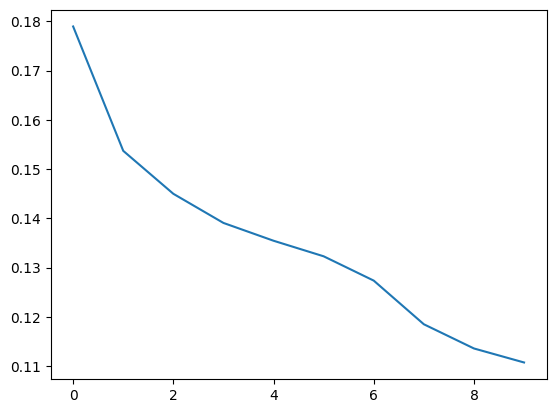

In [170]:
plt.plot(history.history['loss'],label='train')


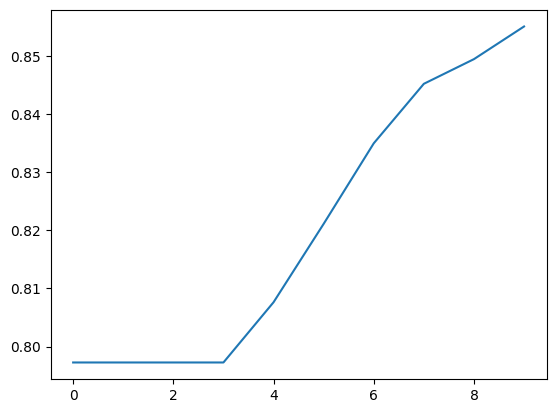

In [171]:
plt.plot(history.history['accuracy'],label='train')


In [172]:
model.layers[0].get_weights()

[array([[ 0.12091267,  0.19538294,  0.01367867, -0.2562868 , -0.20599641,
          0.10159904, -0.05773563, -0.32267994, -0.31923908,  0.17978236,
          0.14805481],
        [-0.947254  , -0.01763217, -0.40242204, -0.94324476,  0.44194308,
         -0.38553992, -0.36787477, -0.0270001 ,  0.00482687,  0.50864613,
         -0.4449765 ],
        [ 0.36880082, -0.24290606, -0.12179061,  0.1552102 ,  0.19695756,
         -0.21348569,  0.16420329,  0.06354244, -0.05947918,  0.05698491,
         -0.13281874],
        [-0.2705445 ,  0.46081582, -0.13329385,  0.200049  , -0.42435429,
         -0.38456362,  0.42293   ,  0.06471211, -0.44857082, -0.39556086,
         -0.16714302],
        [-0.17642978, -0.14893162,  0.79299104, -0.18353337,  0.25944027,
         -0.12953083, -0.51335144, -0.2779613 , -0.51186836, -0.35392857,
          0.01485343],
        [ 0.319075  , -0.24291366,  0.20666914, -0.3124989 ,  0.07279502,
          0.32865494, -0.28211766, -0.09829804,  0.27750903,  0.105042 

In [173]:
y_log=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [174]:
y_pred= np.where(y_log>0.5,1,0)

In [175]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8525